# 0004.020 EDA - Results

In [1]:
import pathlib
# import os
import sys
# import pickle
# import inspect

import pandas as pd
# import scipy.stats as stats
# import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

from src.visualization.visualize import extend_cols
#                                          vstacked_bar_charts,
#                                          diagnose_discrete_fit)
# from src.visualization.fit_dists import fit_nbinom

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

EDA_FP = PROJECT_DIR / 'data' / 'reference' / 'eda' / 'sample.csv'

In [2]:
df_orig = pd.read_csv(EDA_FP, parse_dates=['date']).sort_values(by=['date', 'h', 'a']).reset_index(drop=True)
cols = extend_cols([])
df_orig = df_orig[cols]
df_orig.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin


In [3]:
df_orig.tail()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result
913,germany,bundesliga,2009-2010,2010-05-08,mainz,schalke,0.0,0.0,12,10,4,3,draw
914,germany,bundesliga,2009-2010,2010-05-08,nurnberg,fc-koln,1.0,0.0,13,5,3,2,hwin
915,germany,bundesliga,2009-2010,2010-05-08,sc-freiburg,dortmund,3.0,1.0,14,11,3,5,hwin
916,germany,bundesliga,2009-2010,2010-05-08,sv-werder-bremen,hamburger-sv,1.0,1.0,22,15,8,4,draw
917,germany,bundesliga,2009-2010,2010-05-08,wolfsburg,eintracht-frankfurt,3.0,1.0,16,19,7,3,hwin


In [4]:
df = df_orig.copy(deep=True)
print(f'n_games {len(df)}')
results = df['result'].value_counts()/len(df['result'])
print(results, '\n')

n_games 918
hwin    0.452070
awin    0.288671
draw    0.259259
Name: result, dtype: float64 



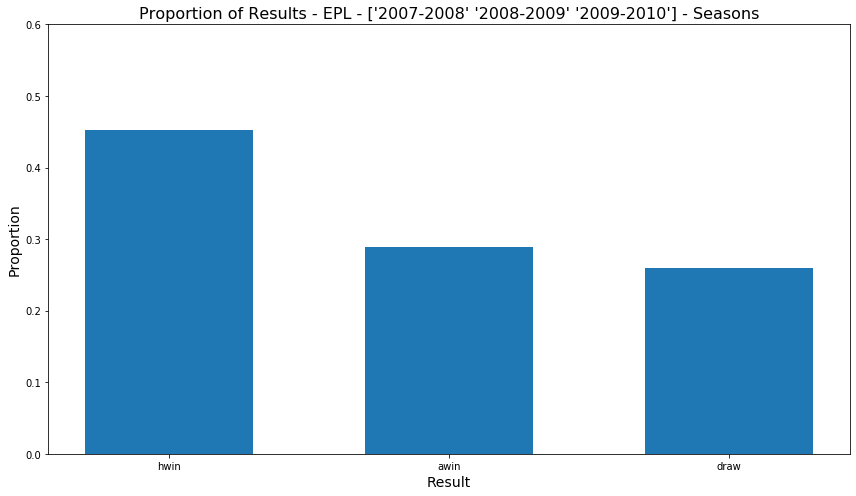

In [5]:
seasons = df['season'].unique()
fig, ax = plt.subplots(figsize=(12,7))

ax.bar(results.index, results.values, width=0.6)

ax.set_ylim(0, 0.6)
ax.set_title(f'Proportion of Results - EPL - {seasons} - Seasons', fontsize=16)
ax.set_xlabel('Result', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
plt.tight_layout()
plt.show();